#Correlation vs mode number

In [1]:
%pylab inline
sys.path.append('/home/photon/code/PylonCCD')
import Qfunction as Qfunc
import scipy.stats as sp

Populating the interactive namespace from numpy and matplotlib


In [3]:
vac_file = np.load("/home/photon/data/06-12-2015/14-43-52_raw.npz")
signal_file = np.load("/home/photon/data/06-12-2015/14-44-47_raw.npz")
vac_data = vac_file['dataOut']
signal_data = signal_file['dataOut']
ncount = signal_file['ncount']
Kp_vac = np.average(vac_data,axis=(1,2))
scaled_vc = np.sqrt(2.0/ncount)*(signal_data - Kp_vac.reshape(600,1,1))

In [26]:
modeA = 183
outputF = scaled_vc[modeA,:,:].flatten()  # Choose the mode to analyze
y_realF = np.real(outputF)
y_imagF = np.imag(outputF)
x_realF = []
x_imagF = []
x_absF = []
outputF = []
Pearson_realF = []
Pearson_imagF = []
magnitudeF = []
modes = range(0,250)
theta = []
single_mode_vacuumF = []
x_vacF = []
photon_numberF = []

for i in modes:
    outputF.append(scaled_vc[i,:,:].flatten())
    x_realF.append(np.real(outputF[i]))
    x_imagF.append(np.imag(outputF[i]))
    x_absF.append(np.abs(outputF[i]))
    RealPearsonF, p = sp.pearsonr(x_realF[i], y_realF)
    ImagPearsonF, p = sp.pearsonr(x_imagF[i], y_imagF)
    magnitudeF.append(np.average(x_absF[i]))
    Pearson_realF.append(RealPearsonF)
    Pearson_imagF.append(ImagPearsonF)
    theta.append(modes[i] * (780e-9*1000)/(600*20e-6))

    #single_mode_vacuumF.append(vacuum_focal_raw[i,:,:].flatten())
    #x_vacF.append(np.real(single_mode_vacuumF[i]))
    #scale_factorF.append(1/(2*x_vacF[i].std()))
    #single_mode_vacuumU.append(vacuum_unblocked_raw[i,:,:].flatten())
    #x_vacU.append(np.real(single_mode_vacuumU[i]))
    #scale_factorU.append(1/(2*x_vacU[i].std()))
    photon_numberF.append(0.5*(np.average(np.abs(outputF[i])))**2)

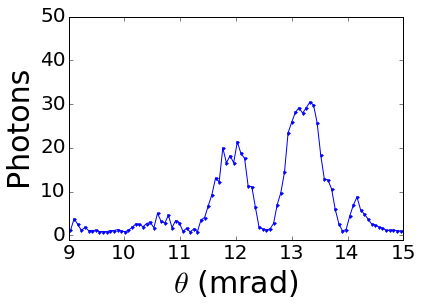

In [27]:
plot(theta[10:300], photon_numberF[10:300] ,".-")
xlabel("$\\theta$ (mrad)",fontsize=30)
ylabel("Photons",fontsize=30)
xlim((9,15))
ylim((-1,50))
tick_params(labelsize=20)

In [36]:
test = [abs(x) for x in Pearson_realF]

[9, 15, -1.1, 1.1]

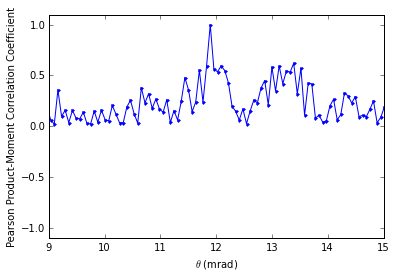

In [37]:
plot(theta,test,".-")
#plot(theta,Pearson_imagF,".-")
xlabel("$\\theta$ (mrad)")
ylabel("Pearson Product-Moment Correlation Coefficient")
axis([9,15,-1.1,1.1])

[9, 15, -1.1, 1.1]

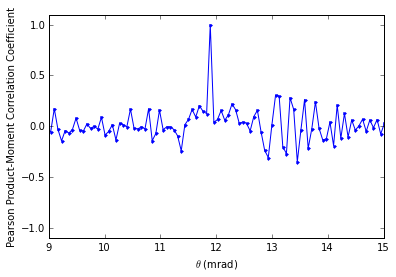

In [29]:
plot(theta,Pearson_imagF,".-")
#plot(theta,Pearson_imagU,".-")
xlabel("$\\theta$ (mrad)")
ylabel("Pearson Product-Moment Correlation Coefficient")
axis([9,15,-1.1,1.1])